# Machine Learning Math From Scratch
---

Hello and welcome. This book will demonstrate math that is essential to really understand what is going on in the future algorithms. We will go over the following:
- Calculus I (differentiation specifically),
- Linear Algebra, and some
- Probability

These mathematics are fundamental to machine learning. I assume the reader is familiar with graphs of linear and polynomial equations, as this is essential to undertstanding the concepts to follow.

---
## Calculus I : Differentiation

Suppose we travel in a car from point $A$ to point $B$. We can represent the travel on a graph with the $x$ axis being the time of travel and $y$ the velocity of the car. The car will be traveling with a bell curve type graph. To show this, we will use the following function: $f(x) = sin(x)$ and cut off the graph at $pi$.

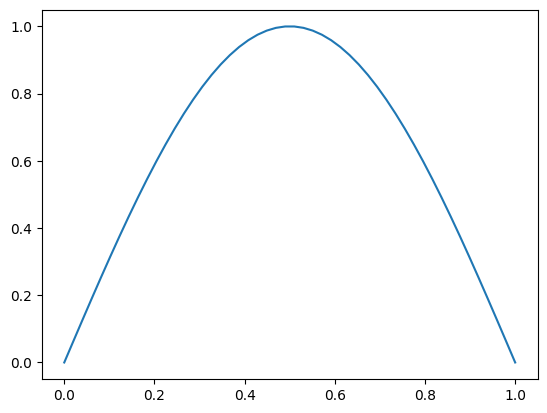

In [22]:
import matplotlib.pyplot as plt
import numpy as np
import math

def f(x):
    return math.sin(x)

x = np.linspace(0.0, 1, 50)
y = []

for i in range(0, len(x)):
    xi = x[i] * math.pi
    y.append(f(xi))

plt.plot(x, y)

Since the velocity increases with time, we can understand the car is accelerating, then reaches an apec where there is no acceleration, then accelerates again as it slows to a stop. Now, how would find the average acceleration from $t=0$ to $t=0.5$? We could use the following:
$$
(v[t=0.5] + v[t=0.0])/2
$$

And this would give us the average acceleration (which will be the slope) like so.

Slope m = 0.34784127530174325


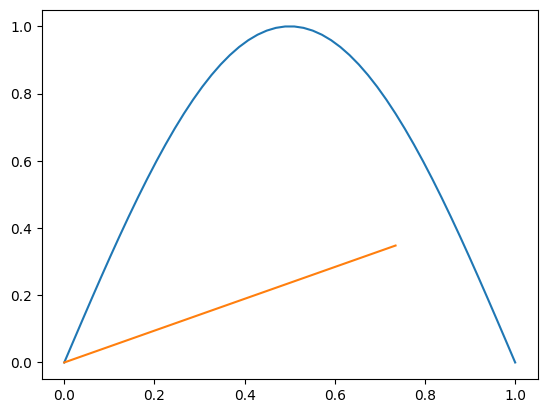

In [43]:
# This is the slope of the line
def slope(v1, v2):
    return (v2 - v1) / 2

def graph_acceleration(t1, t2, x, y):
    m = slope(y[int(t1 * 50)], y[int(t2 * 50)])
    print(f'Slope m = {m}')
    y_acc = m * np.linspace(0, 1, int(t2*50))

    fig, ax = plt.subplots()
    ax.plot(x, y)
    ax.plot(x[0:int(t2 * 50)], y_acc)

t1 = 0
t2 = .75
graph_acceleration(t1, t2, x, y)

What happens when you change $t2$ to $1s$? The line goes parallel to the axis. Why? Because the average acceleration from $0$ to $1$ is $0$.

Differentiation is at it's most basic level exactly this. The general formual for differentiation is:
$$
dF = (f(x + h) \times f(x))/(2h) 
$$

Where $d$ means to differentiate. Simply put, the derivative (or differatiation) of a function is its *instantaneous rate of change*.

### Continuing Differentation

To close this, it is enough to understand that we can also find the derivative of a function by using certain properties and laws perviously found by mathematicians. For example, the function used above has the following derivative:
$$
f' \text{ (the apostrophe indicates 'd', or derivative, of a function)} = -cos(x)
$$

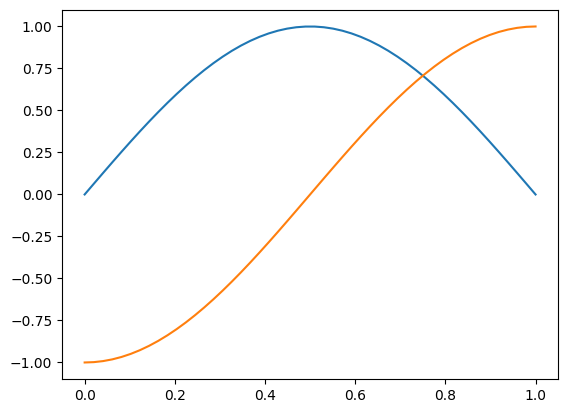

In [45]:
def df(x):
    return -math.cos(x)

x = np.linspace(0.0, 1, 50)
dy = []

for i in range(0, len(x)):
    xi = x[i] * math.pi
    dy.append(df(xi))

fig, ax = plt.subplots()
ax.plot(x, y)
ax.plot(x, dy)

---

## Linear Algebra

Now to a very important topic: Linear Algebra. The following topics must be understood:
- Scalars, Vectors, and Tensors,
- Linear Algebraic Operations,
- Vector Spaces and Basis,
- Matrix Decomposition, and
- Norms and Distance Metrics

### Scalars, Vectors, and Tensors

A *scalar* is a single value. For example, $1$ is a scalar number. A vector is an array, or sequence of numbers. In the context of linear algebra, a vector describes a line with a magnitude and direction in a space $R^{n}$, where $R$ is a space with $n$ components. Here is an example of a vector:
$$
\text{vector } \bar{v} = \begin{bmatrix} v_1 \\ v_2 \\ v_3 \end{bmatrix}
$$

There is only 1 dimension to the vector. A tensor can be a vector or a matrix. It is a term to indicate the possibility of multiple dimensions and positions. Thus, a tensor is in a $R^{m \times n}$ space, where $m$ are the number of rows and $n$ the columns.

### Linear Algebraic Operations

There are a few operations we must go over when discussing tensor math. You can perform:
- Addition
- Subtraction
- Division
- Multiplication

as some basic operations. You can use operations of a scalar on any tensor, but you can't use these operations for tensors of differing dimensions $m$ and $n$. Scalars are simply operated over each element of the tensor individually.

Scalars will be lowercase and tensors uppercase for the remainder of the notebooks. 
$$
a + A^{2 \times 2} = \begin{bmatrix} a+a1, a+a2 \\ a+a3, a+a4 \end{bmatrix} 
$$

The same goes for every other operator. It is elementwise. Similarly goes for tensors of like dimensionality.
$$
A^{2 \times 2} + B^{2 \times 2} = \begin{bmatrix} a1+b1, a2+b2 \\ a3+b3, a4+b4 \end{bmatrix}
$$

In [67]:
def addition(A, B):
    if(A.shape != B.shape):
        print(f"A shape {A.shape} does not match B shape {B.shape}")
        return None
    
    C = np.zeros(shape=(len(A), len(A[:])), dtype=np.int64)
    for m in range(0, len(A)):
        for n in range(len(A[m])):
            C[m][n] = A[m][n] + B[m][n]
    return C

def subtraction(A, B):
    if(A.shape != B.shape):
        print(f"A shape {A.shape} does not match B shape {B.shape}")
        return None
    
    C = np.zeros(shape=(len(A), len(A[:])), dtype=np.int64)
    for m in range(0, len(A)):
        for n in range(len(A[m])):
            C[m][n] = A[m][n] - B[m][n]
    return C

def division(A, B):
    if(A.shape != B.shape):
        print(f"A shape {A.shape} does not match B shape {B.shape}")
        return None
    
    C = np.zeros(shape=(len(A), len(A[:])), dtype=np.int64)
    for m in range(0, len(A)):
        for n in range(len(A[m])):
            C[m][n] = A[m][n] / B[m][n]
    return C

def multiplication(A, B):
    if(A.shape != B.shape):
        print(f"A shape {A.shape} does not match B shape {B.shape}")
        return None
    
    C = np.zeros(shape=(len(A), len(A[:])), dtype=np.int64)
    for m in range(0, len(A)):
        for n in range(len(A[m])):
            C[m][n] = A[m][n] + B[m][n]
    return C

A = np.array([[1, 1], [1, 1]])
B = np.array([[1, 2], [2, 1]])

print(f"A:\n{A}\nB:\n{B}")

C = addition(A, B)
print(f"A + B:\n{C}")

# Ok, now let's use the rest of the operators

print(f"Subtraction, A - B:\n{subtraction(A, B)}")
print(f"Division, A div B:\n{division(A, B)}")
print(f"Multiplication, A * B:\n{multiplication(A, B)}")

A:
[[1 1]
 [1 1]]
B:
[[1 2]
 [2 1]]
A + B:
[[2 3]
 [3 2]]
Subtraction, A - B:
[[ 0 -1]
 [-1  0]]
Division, A div B:
[[1 0]
 [0 1]]
Multiplication, A * B:
[[2 3]
 [3 2]]


#### The Dot Product and Matrix Multiplication

I showed you all the element-wise operations for tensors. Now we will go over unique operations that give very meaning to the product matrix. By looking at this section's title, you're probably thinking, "Now wait a minute. We just went over matrix multiplication!" We went over **element-wise** matrix multiplication. The kind discussed in this section uses the **Dot Product** (which is vector specific) across all the dimensions in a multidimensioned tensor.

The dot product can be defined as the difference between two vectors (or tensors with only a single row). See the expression below that described the dot product:
$$
\bar{a} \cdot \bar{b} = \sum_{i = 1}^{n} a_i b_i
$$
or, if we know the angle between the two:
$$
\bar{a} \cdot \bar{b} = |\bar{a}| |\bar{b}| \text{ } cos(\theta)
$$
This shows that the dot product is *maximized* when the vectors are orthogonal (or 90 degrees) from each other. Similarly, we can apply this operation to tensors (or matrices) of multiple dimensions. Instead of a $\cdot$ to indicate this operation, we use $\times$ when performing **Matrix Multiplication**. Since we are measuring similarity, we use the dot product across dimensions, meaning the inner dimensions (if $A^{m \times n}$ and $B^{n \times p}$ then $n$ is the inner dimension) must match as the resultant matrix $C$ will be a $m \times m$. This is because we do dimension-wise operations. The columns of $B$ will be dot producted across the rows of $A$.
$$
A^{=\begin{bmatrix}1, 3, 2 \\ 2, 1, 2 \end{bmatrix}} \times
B^{= \begin{bmatrix}2, 1 \\ 1, 2 \\ 3, 2 \end{bmatrix}} =
C^{= \begin{bmatrix}11, 11 \\ 11, 8 \end{bmatrix}} 
$$

Now for implementation.

In [ ]:
def dot(a, b):
    if(a.shape != b.shape):
        print(f'shape of a does note match b')
        return None
    
    c = 0
    for ai, bi in zip(a, b):
        c += ai * bi
    return c

a = np.array([2, 1, 3])
b = np.array([1, 3, 2])
print(dot(a, b))

def mat_2D_multiplication(A, B):
    if(A.shape[1] != B.shape[0]):
        print(f"Shape of A is {A.shape} and B {B.shape}")
        return None
    
    m = A.shape[0]
    n = A.shape[1]
    p = B.shape[1]
    
    B_T = B.T # Transpose B so we use cache to make operation faster
    C = np.zeros(shape=(m, p), dtype=A.dtype)
    for i in range(m):
        for j in range(p):
            C[i, j] = dot(A[i], B_T[j])

    return C

A = np.array([[1, 3, 2], [2, 1, 2]])
B = np.array([[2, 1], [1, 2], [3, 2]])

print(mat_2D_multiplication(A,B))

11
[[11 11]
 [11  8]]
